# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [3]:
df=pd.read_csv('housing.csv')
df.shape

(20640, 10)

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [4]:
df.dropna(inplace=True)
df.shape

(20433, 10)

4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [5]:
columns_to_drop = ['latitude', 'longitude', 'ocean_proximity']
corr_df = df.drop(columns=columns_to_drop)

corr_with_target = corr_df.corrwith(df['median_house_value'])

print(corr_with_target)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64


5. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above). 

In [6]:
X = df.drop(columns=['median_house_value'])
Y = df['median_house_value']

print("Feature DataFrame X:")
print(X.head())

print("\nTarget Series Y:")
print(Y.head())

Feature DataFrame X:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  

Target Series Y:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

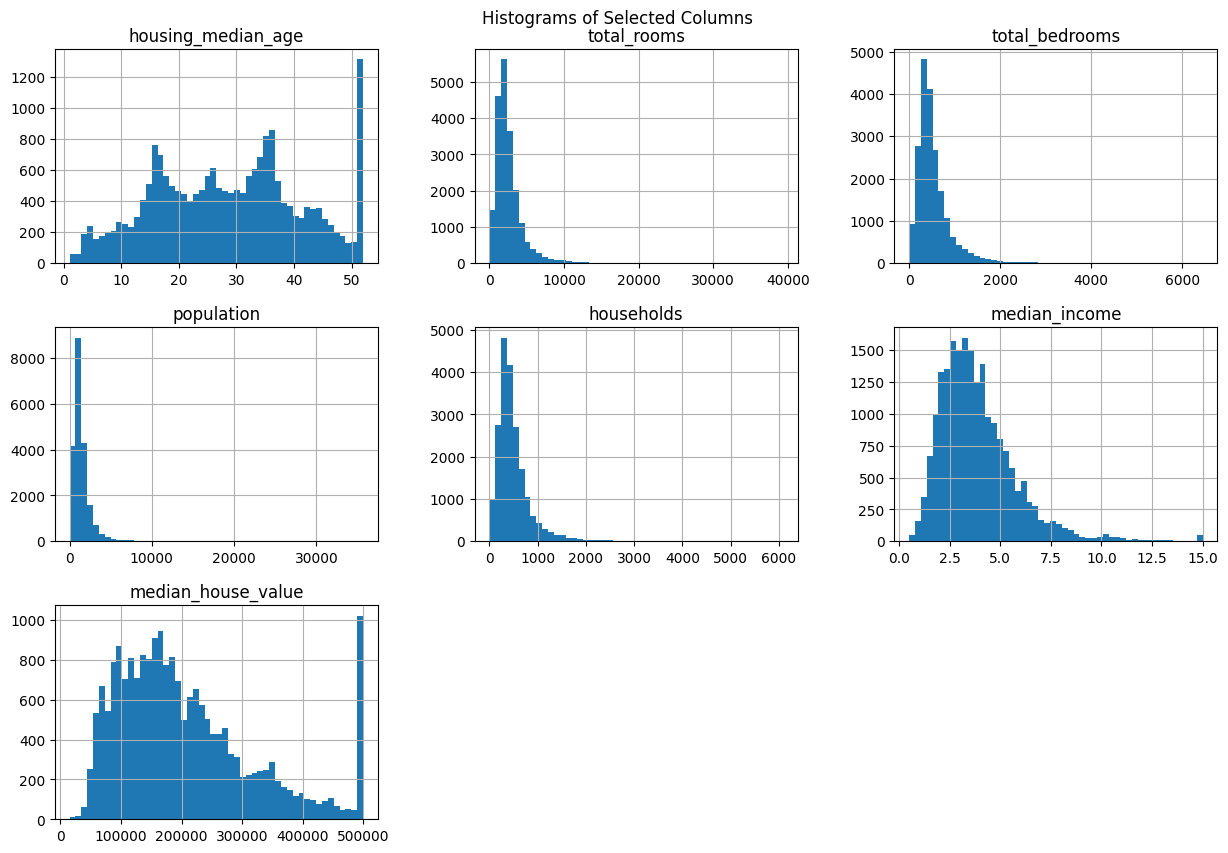

In [7]:
columns_to_visualize = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

df[columns_to_visualize].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Selected Columns', y=0.92) 
plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [8]:
descriptive_stats = df.describe()

print("Descriptive Statistics for Each Feature:")
print(descriptive_stats)

Descriptive Statistics for Each Feature:
          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.0000

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [9]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

print("DataFrame with One-Hot Encoding:")
print(df.head())

DataFrame with One-Hot Encoding:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False   

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [10]:
X = df.drop(columns=['median_house_value'])
Y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=222)

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [11]:
scaler_features = StandardScaler()
scaler_target = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [12]:
X_train_scaled = scaler_features.fit_transform(X_train)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler_target.fit_transform(y_train_reshaped)

X_train = X_train_scaled
y_train = y_train_scaled

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [13]:
X_test_scaled = scaler_features.transform(X_test)

y_test_reshaped = y_test.values.reshape(-1, 1)
y_test_scaled = scaler_target.fit_transform(y_test_reshaped)

y_test = y_test_scaled
X_test = X_test_scaled

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

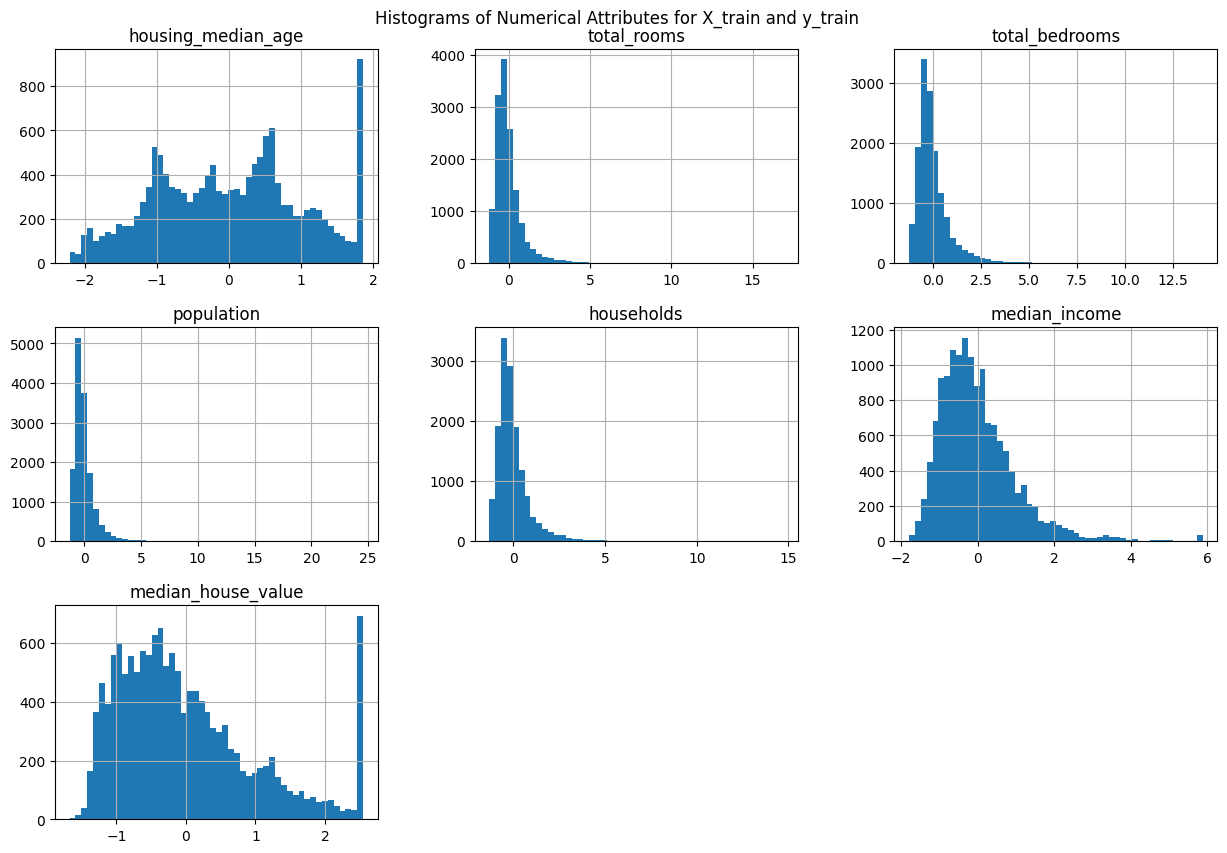

In [14]:
numerical_attributes = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

train_data = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.DataFrame(y_train, columns=['median_house_value'])], axis=1)

train_data[numerical_attributes].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Attributes for X_train and y_train', y=0.92)
plt.show()

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [15]:
linear_regression_model = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [16]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [17]:
y_preds = linear_regression_model.predict(X_test)

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [18]:
y_preds = scaler_target.inverse_transform(y_preds)
y_test = scaler_target.inverse_transform(y_test) 

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [19]:
n_components = 2
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

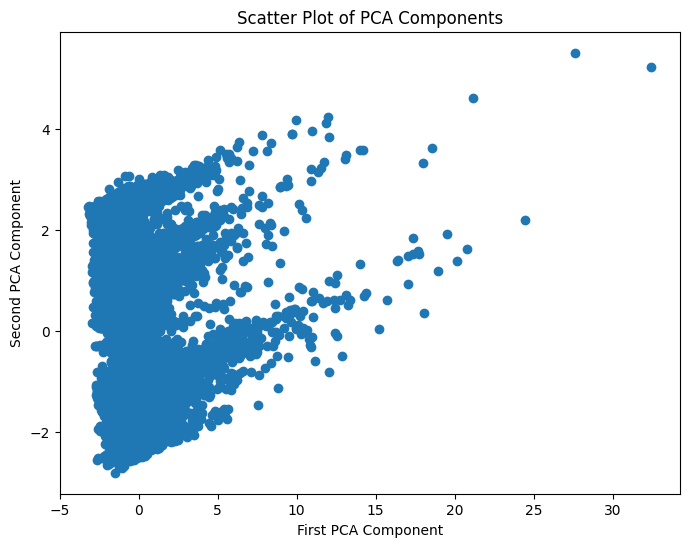

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('Scatter Plot of PCA Components')
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [21]:
total_variance_percentage = sum(pca.explained_variance_ratio_) * 100
print(f"Total Percentage of Variance Captured by 2 PCA Components: {total_variance_percentage:.2f}%")

singular_values = pca.singular_values_
print(f"Singular Values (Strength) of PCA Components:")
for i, value in enumerate(singular_values):
    print(f"PCA Component {i + 1}: {value:.4f}")

Total Percentage of Variance Captured by 2 PCA Components: 51.42%
Singular Values (Strength) of PCA Components:
PCA Component 1: 236.9276
PCA Component 2: 179.2125


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

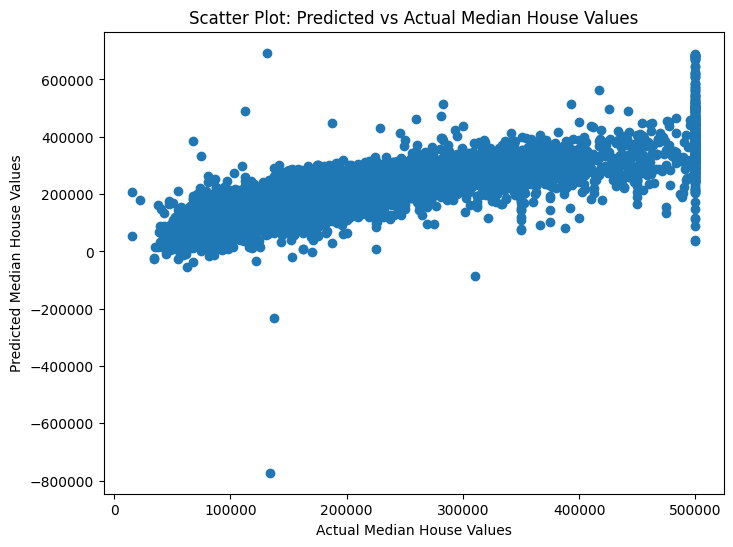

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds)
plt.title('Scatter Plot: Predicted vs Actual Median House Values')
plt.xlabel('Actual Median House Values')
plt.ylabel('Predicted Median House Values')
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [23]:
mape = mean_absolute_percentage_error(y_test, y_preds)

rmse = np.sqrt(mean_squared_error(y_test, y_preds, squared=False))

r2 = r2_score(y_test, y_preds)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

MAPE: 0.29%
RMSE: 265.06
R-squared (R2): 0.6373


In [37]:
coefficients = linear_regression_model.coef_
feature_names = X.columns.tolist()

coefficients_flat = coefficients.flatten()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_flat})
continuous_features_df = coefficients_df[coefficients_df['Feature'].isin(feature_names)]
sorted_features = continuous_features_df.reindex(continuous_features_df['Coefficient'].sort_values(ascending=False).index)

print(sorted_features)

                       Feature  Coefficient
7                median_income     0.642888
4               total_bedrooms     0.326248
6                   households     0.220022
2           housing_median_age     0.111307
9       ocean_proximity_ISLAND     0.012391
11  ocean_proximity_NEAR OCEAN     0.009728
10    ocean_proximity_NEAR BAY    -0.017095
3                  total_rooms    -0.097549
8       ocean_proximity_INLAND    -0.156682
5                   population    -0.410426
0                    longitude    -0.488375
1                     latitude    -0.496330
